In [6]:
import os
import pickle

root_dir = '/home/jxm3/random/interpretable-autoprompting/'

hotflip_indices = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_indices.p'), 'rb'))
hotflip_values = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_values.p'), 'rb'))
hotflip_losses = pickle.load(open(os.path.join(root_dir, 'hotflip_losses.p'), 'rb'))

In [9]:
import pandas as pd

df = pd.DataFrame(zip(hotflip_indices, hotflip_values, hotflip_losses), columns=['token_idx', 'grad_value', 'loss'])
df.head()

,token_idx,grad_value,loss
0,37633,-0.759008,28.759841
1,19510,-0.713214,28.386833
2,861,-0.693773,28.453197
3,33096,-0.663077,28.686625
4,41359,-0.643015,28.380645


[Text(0.5, 0, 'gradient wrt word'),
 Text(0, 0.5, 'actual loss when word is substituted')]

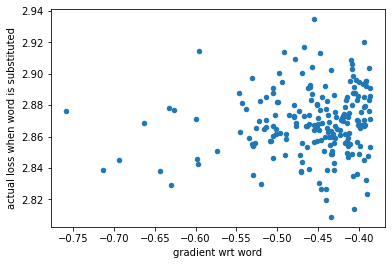

In [25]:
import math

df['loss_scaled'] = df['loss'] / 10
ax = df.plot(x='grad_value', y='loss_scaled', kind='scatter', logx=False, logy=False)
ax.set(xlabel="gradient wrt word", ylabel="actual loss when word is substituted")

In [1]:
import glob

In [4]:
glob.glob('../*.p')

['../hotflip_grads_data_yes_preprefix.p', '../hotflip_grads_data.p']

In [16]:
import pandas as pd
import pickle

data_raw = (
    pickle.load(open('../hotflip_grads_data_yes_preprefix.p', 'rb'))
)
data = []
epoch = -1
rank = 0
for d in data_raw:
    if d[0] == 0:
        epoch += 1
        rank = 0
    data.append((epoch, rank, *d[1:]))
    rank += 1
df = pd.DataFrame(data, columns=['epoch', 'rank', 'token', 'grad', 'n_correct'])

<AxesSubplot:xlabel='rank', ylabel='grad'>

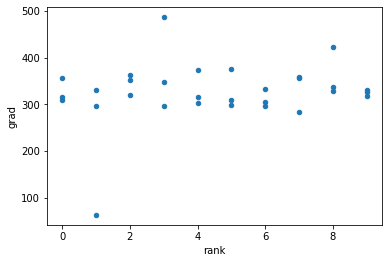

In [20]:
import seaborn as sns
sns.scat(kind='scatter', x='rank', y='grad')

In [11]:
data

[]